# ----- Covariance & Correlation -----

## *From Scratch*

In [1]:
def mean(data):
    return sum(data) / len(data)

In [2]:
def covariance(x, y):
    n = len(x)
    mean_x = mean(x)
    mean_y = mean(y)
    return sum((x[i] - mean_x) * (y[i] - mean_y) for i in range(n)) / (n - 1)

In [3]:
def correlation(x, y):
    cov = covariance(x, y)
    std_x = (sum((xi - mean(x))**2 for xi in x) / (len(x) - 1))**0.5
    std_y = (sum((yi - mean(y))**2 for yi in y) / (len(y) - 1))**0.5
    return cov / (std_x * std_y)

In [4]:
# ----- Example -----
x = [2, 4, 6, 8, 10]
y = [1, 3, 5, 7, 9]

In [5]:
print("Covariance (from scratch):", round(covariance(x, y), 3))

Covariance (from scratch): 10.0


In [6]:
print("Correlation (from scratch):", round(correlation(x, y), 3))

Correlation (from scratch): 1.0


## *Using Libraries*

In [7]:
import numpy as np

In [8]:
# ----- Example Data -----
x = np.array([2, 4, 6, 8, 10])
y = np.array([1, 3, 5, 7, 9])

In [9]:
# ----- Covariance -----
cov_matrix = np.cov(x, y, bias=False)  # bias=False => sample covariance
cov_xy = cov_matrix[0, 1]

In [10]:
# ----- Correlation -----
corr_matrix = np.corrcoef(x, y)
corr_xy = corr_matrix[0, 1]

In [11]:
# ----- Display -----
print("Covariance Matrix:\n", cov_matrix)
print("\nCovariance between X and Y:", round(cov_xy, 3))

Covariance Matrix:
 [[10. 10.]
 [10. 10.]]

Covariance between X and Y: 10.0


In [12]:
print("\nCorrelation Matrix:\n", corr_matrix)
print("\nCorrelation between X and Y:", round(corr_xy, 3))


Correlation Matrix:
 [[1. 1.]
 [1. 1.]]

Correlation between X and Y: 1.0


## *Covariance Matrix Heatmap*

Covariance Matrix:
 [[62.5  75.   32.5 ]
 [75.   92.5  38.75]
 [32.5  38.75 17.  ]]


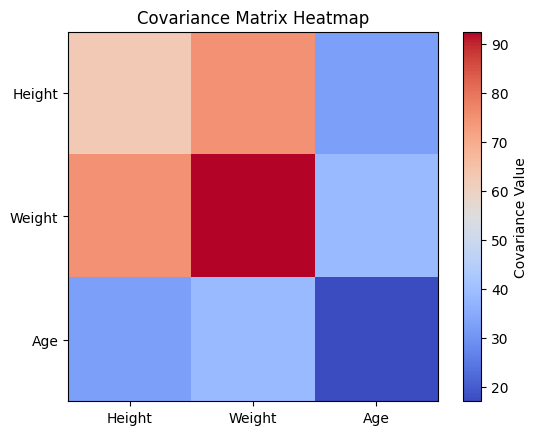

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# ----- Example Data -----
# Let's say we have 3 features (like height, weight, and age)
data = np.array([
    [170, 65, 25],
    [180, 80, 30],
    [160, 55, 20],
    [175, 70, 28],
    [165, 60, 22]
])

# ----- Compute Covariance Matrix -----
# Each column = a feature, so we set rowvar=False
cov_matrix = np.cov(data, rowvar=False)

print("Covariance Matrix:\n", cov_matrix)

# ----- Plot as Heatmap -----
plt.imshow(cov_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Covariance Value')

# Label the axes
features = ['Height', 'Weight', 'Age']
plt.xticks(np.arange(3), features)
plt.yticks(np.arange(3), features)

plt.title("Covariance Matrix Heatmap")
plt.show()

## *Scatter Plot (Types of Correlation)*

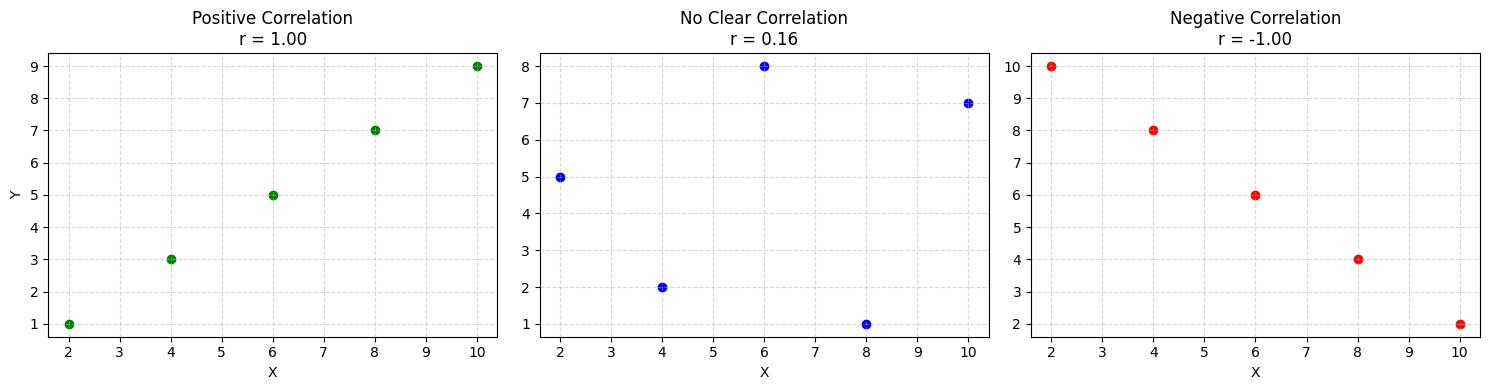

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# ----- Example Data -----
x = np.array([2, 4, 6, 8, 10])

# Perfect Positive Correlation
y1 = np.array([1, 3, 5, 7, 9])

# No Correlation (Random)
y2 = np.array([5, 2, 8, 1, 7])

# Perfect Negative Correlation
y3 = np.array([10, 8, 6, 4, 2])

# ----- Calculate Correlations -----
corr1 = np.corrcoef(x, y1)[0, 1]
corr2 = np.corrcoef(x, y2)[0, 1]
corr3 = np.corrcoef(x, y3)[0, 1]

# ----- Plot -----
plt.figure(figsize=(15, 4))

# Positive Correlation
plt.subplot(1, 3, 1)
plt.scatter(x, y1, color='g')
plt.title(f'Positive Correlation\nr = {corr1:.2f}')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, linestyle='--', alpha=0.5)

# No Correlation
plt.subplot(1, 3, 2)
plt.scatter(x, y2, color='b')
plt.title(f'No Clear Correlation\nr = {corr2:.2f}')
plt.xlabel('X')
plt.grid(True, linestyle='--', alpha=0.5)

# Negative Correlation
plt.subplot(1, 3, 3)
plt.scatter(x, y3, color='r')
plt.title(f'Negative Correlation\nr = {corr3:.2f}')
plt.xlabel('X')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()